In [11]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
# import newspaper

In [12]:
def improt_data(lujing,code):
    data = pd.read_excel(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['订单号']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        dict_ = {}
    
        if sum_ > 1 :
            list__.append(b)
            dict_ = {b:sum_}
            list_sum.append(dict_)
        else:
            list__.append(b)
            dict_ = {b:sum_}
            list_sum_.append(dict_)
        i = i + 1  
    k = [list_sum,list_sum_,list__]
    return k

In [14]:
lujing = '销售额.xls'
code = 'utf8'
df = improt_data(lujing,code)

In [15]:
df

,日期,商品类型,商品id,商品名称,商品售卖量,商品售卖金额,曝光人数,访问人数
0,2020-08-01,团购,35804226,【约会爆款】11枝玫瑰礼盒套餐,0,0.0,632,39
1,2020-08-01,团购,35818597,【约会推荐】11枝玫瑰爆款花束,0,0.0,98,12
2,2020-08-01,团购,35818693,【邂逅爱情】11枝玫瑰表白花束,0,0.0,133,31
3,2020-08-01,团购,35825487,【网红爆款】康乃馨百合混搭花束,0,0.0,178,22
4,2020-08-01,团购,35825649,【感恩玫瑰】向日葵玫瑰鲜花花束,0,0.0,17,14
...,...,...,...,...,...,...,...,...
1750,2020-08-31,团购,36201323,【散步斜阳】33枝手提花篮,0,0.0,3,0
1751,2020-08-31,团购,36396949,【开业大麦】大麦开业花篮 单个,0,0.0,18,7
1752,2020-08-31,团购,36397724,大吉大利-单层开业花篮 单个,0,0.0,6,0
1753,2020-08-31,团购,611934392,【一心一意】11枝玫瑰表白礼盒,0,0.0,4,2


In [16]:
df = df[df['商品售卖金额'] > 0]
df = df[df['商品售卖量'] >1]
df['商品售卖金额'].sum()

4100.0

In [17]:
name = df.drop_duplicates(subset='商品名称',inplace=False)
name = list(name['商品名称'])
for i in name :
    a = df[df['商品名称'] == i]
    x = a['商品售卖量'].sum()
    y = a['商品售卖金额'].sum()
    print(i)
    print(x)
    print(y)
    print('----------------')

【到店自取】单只向日葵
42
1176.0
----------------
单层开业花篮一对
2
176.0
----------------
【满心欢喜】19枝玫瑰鲜花花束
6
974.0
----------------
【生如夏花】向日葵玫瑰韩式花束
2
218.0
----------------
【美轮美奂】9支玫瑰鲜花花束
2
138.0
----------------
【宛若清风】99枝玫瑰求婚花束
2
1418.0
----------------


In [21]:
lujing = '八月成交订单.xlsx'
code = 'utf8'
df = improt_data(lujing,code)

In [22]:
df['下单时间'] = pd.to_datetime(df['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [23]:
df['day'] = df['下单时间'].dt.day

In [24]:
df_ = df[(df['day'] != 24)  & (df['day'] != 25)]

In [25]:
drop_du(df_,'商品名称')

[[{'【一世爱人】33枝玫瑰鲜花礼盒': 2},
  {'【百年好合】多头百合鲜花花束': 8},
  {'【盛夏光年】33枝玫瑰花束套餐': 6},
  {'【开业大麦】大麦开业花篮 一对': 4},
  {'【一生爱你】11枝玫瑰百合花束': 3},
  {'【一生所爱】19枝玫瑰表白礼盒': 13},
  {'【相思】19枝白粉混搭玫瑰手提花篮': 3},
  {'单层开业花篮一对': 3},
  {'【心若向阳】33枝韩式皇冠花束': 10},
  {'【一心一意】11枝玫瑰表白礼盒': 16},
  {'【如花美眷】11枝玫瑰鲜花礼盒': 19},
  {'【砰然心动】爆款表白玫瑰礼盒': 3},
  {'【午后阳光】康乃馨混搭女王抱抱桶': 7},
  {'【一见钟情】满天星表白花束': 23},
  {'【开业大吉】生意大麦花束': 16},
  {'【网红爆款】康乃馨百合混搭花束': 17},
  {'【微微一笑】11枝玫瑰表白花束': 26},
  {'到店自取送老师单枝向日葵': 19},
  {'【默默的爱】33枝玫瑰韩式花束': 24},
  {'【半夏倾心】52枝玫瑰女神花束': 6},
  {' 【满心欢喜】19枝玫瑰鲜花花束': 23},
  {'【送老师】到店自取康乃馨鲜花花束': 9},
  {'【刻满关怀】19支玫瑰鲜花礼盒': 4},
  {'【送老师】向日葵鲜花花束': 4},
  {'【钟爱一生】11支玫瑰鲜花花束': 3},
  {'【送老师】到店自取小花束单个': 14},
  {'【春水盈盈】21枝玫瑰鲜花花束': 13},
  {'【天缘巧合】33枝玫瑰鲜花花束': 52},
  {'【手捧星河】简约小花束': 8},
  {'【恩情似海】玫瑰康乃馨混搭礼盒': 9},
  {'【美轮美奂】9支玫瑰鲜花花束': 68},
  {'【生如夏花】向日葵玫瑰韩式花束': 97},
  {'【琴瑟之好】11枝玫瑰女王花束': 9},
  {'【致女王】99枝玫瑰表白鲜花花束': 16},
  {' 【约会爆款】11枝玫瑰礼盒套餐': 93},
  {'到店自取-单枝向日葵': 152},
  {'【送老师】6枝向日葵韩式鲜花': 10},
  {'【感恩玫瑰】向日葵玫瑰鲜花花束': 35},
  {'【夕颜若雪】11枝康乃

In [26]:
df_

,Unnamed: 0,下单城市,订单号,下单时间,下单门店,商品名称,商品规格,商品总数,商品总额,实收金额,优惠金额,订单状态,配送方式,商家备注,配送地址,收货人/订货人,收货人/订货人电话,快递单号,day
0,0,白山,159877862240350210288259,2020-08-30 17:10:22,邂逅花坊鲜花(青青花行),【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,吉林省白山市浑江区通江路122号农业招待所(通江路)农业农村局通江路122号 138439...,徐志刚,13843913300,NaN,30
1,1,唐山,159868977841338240134132,2020-08-29 16:29:38,印象IOO鲜花,【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,河北省唐山市路北区建华西道2-13号甬妈妈(一号店)唐山市,刘,13752760199,NaN,29
2,2,唐山,159875091288992940956611,2020-08-30 09:28:32,印象IOO鲜花,【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,到店自取,NaN,NaN,NaN,18331863302,NaN,30
3,3,唐山,159879061400843650981903,2020-08-30 20:30:14,邂逅花坊鲜花(枫荷鲜花庆典),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河北省唐山市古冶区新光路4号龙江瑞景北门底商济仁堂门诊,王司洋,13931496469,NaN,30
4,4,长垣市,159858512956635280188597,2020-08-28 11:25:29,邂逅花坊鲜花(千艺鲜花),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河南省新乡市长垣市河南省新乡市长垣市蒲西街道会友路与宏力大道交叉口西南50米长垣市水利局到门...,郭,18503874093,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1835,北京,159628042706548640461640,2020-08-01 19:13:47,邂逅花坊鲜花(雪莲花艺),【感恩玫瑰】向日葵玫瑰鲜花花束,NaN,1,149,149.0,0.0,已完成,到店自取,NaN,NaN,NaN,15810368810,NaN,1
955,1836,舒城县,159625734604815560946023,2020-08-01 12:49:06,邂逅花坊鲜花(馨馨花艺店),【佳人才子】11枝玫瑰鲜花花束,NaN,1,89,89.0,0.0,已完成,商家配送,NaN,安徽省六安市舒城县合安路广进久富商业广场3号楼安丰皇家宾馆,高云,15862517146,NaN,1
956,1837,蓝田县,159628347440959280397659,2020-08-01 20:04:34,邂逅花坊鲜花(七彩鲜花),【夕颜若雪】11枝康乃馨鲜花束,NaN,1,79,79.0,0.0,已完成,商家配送,NaN,陕西省西安市蓝田县北环路西段20号开诚酒店大厅,许,15229268628,NaN,1
957,1838,南康区,159626153782112950500073,2020-08-01 13:58:57,邂逅花坊鲜花(遇见花坊),【如花似玉】33枝玫瑰百合花束,NaN,1,189,189.0,0.0,已完成,商家配送,NaN,江西省赣州市南康区南水大道南150米顶呱呱托管中心到了顶呱呱幼儿园打电话,杜平英,15170194577,NaN,1


In [27]:
print(df_.drop_duplicates(subset='下单门店',inplace=False)['订单号'].count())
print(df_.drop_duplicates(subset='商品名称',inplace=False)['订单号'].count())
print(df_['订单号'].count())
print(df_['实收金额'].sum())

148
47
959
126379.2


In [28]:
df_name = df_['商品名称']
list_name = list(df_name)
text = jiebe(list_name)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.722 seconds.
Prefix dict has been built successfully.


In [29]:
stopwords_ = ['【','】','，','+','花束','鲜花','搭配']
text_list= clean(text,stopwords_)

In [30]:
content = ','.join(text_list)
df_content = pd.DataFrame({'content':text_list})
df_content.head()

,content
0,"美轮美奂,9,支,玫瑰"
1,"美轮美奂,9,支,玫瑰"
2,"生如夏,花,向日葵,玫瑰,韩式"
3,"生如夏,花,向日葵,玫瑰,韩式"
4,"生如夏,花,向日葵,玫瑰,韩式"


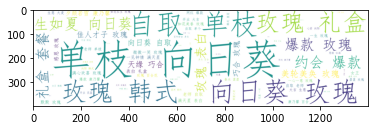

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='simfang.ttf',background_color='white',width=1400,height = 400)
wordcloud.generate(' '.join(text_list))

plt.imshow(wordcloud)

In [32]:
lis = ['玫瑰','康乃馨','向日葵','礼盒','自取','11','19','33','52',]
for i  in lis:
    wenzi(df_,i,'商品名称')

关于“玫瑰”的订单数量是： 606
关于“康乃馨”的订单数量是： 88
关于“向日葵”的订单数量是： 317
关于“礼盒”的订单数量是： 159
关于“自取”的订单数量是： 194
关于“11”的订单数量是： 265
关于“19”的订单数量是： 43
关于“33”的订单数量是： 106
关于“52”的订单数量是： 6


In [33]:
df_['订单号'].count()

959

In [34]:
df_

,Unnamed: 0,下单城市,订单号,下单时间,下单门店,商品名称,商品规格,商品总数,商品总额,实收金额,优惠金额,订单状态,配送方式,商家备注,配送地址,收货人/订货人,收货人/订货人电话,快递单号,day
0,0,白山,159877862240350210288259,2020-08-30 17:10:22,邂逅花坊鲜花(青青花行),【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,吉林省白山市浑江区通江路122号农业招待所(通江路)农业农村局通江路122号 138439...,徐志刚,13843913300,NaN,30
1,1,唐山,159868977841338240134132,2020-08-29 16:29:38,印象IOO鲜花,【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,河北省唐山市路北区建华西道2-13号甬妈妈(一号店)唐山市,刘,13752760199,NaN,29
2,2,唐山,159875091288992940956611,2020-08-30 09:28:32,印象IOO鲜花,【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,到店自取,NaN,NaN,NaN,18331863302,NaN,30
3,3,唐山,159879061400843650981903,2020-08-30 20:30:14,邂逅花坊鲜花(枫荷鲜花庆典),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河北省唐山市古冶区新光路4号龙江瑞景北门底商济仁堂门诊,王司洋,13931496469,NaN,30
4,4,长垣市,159858512956635280188597,2020-08-28 11:25:29,邂逅花坊鲜花(千艺鲜花),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河南省新乡市长垣市河南省新乡市长垣市蒲西街道会友路与宏力大道交叉口西南50米长垣市水利局到门...,郭,18503874093,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1835,北京,159628042706548640461640,2020-08-01 19:13:47,邂逅花坊鲜花(雪莲花艺),【感恩玫瑰】向日葵玫瑰鲜花花束,NaN,1,149,149.0,0.0,已完成,到店自取,NaN,NaN,NaN,15810368810,NaN,1
955,1836,舒城县,159625734604815560946023,2020-08-01 12:49:06,邂逅花坊鲜花(馨馨花艺店),【佳人才子】11枝玫瑰鲜花花束,NaN,1,89,89.0,0.0,已完成,商家配送,NaN,安徽省六安市舒城县合安路广进久富商业广场3号楼安丰皇家宾馆,高云,15862517146,NaN,1
956,1837,蓝田县,159628347440959280397659,2020-08-01 20:04:34,邂逅花坊鲜花(七彩鲜花),【夕颜若雪】11枝康乃馨鲜花束,NaN,1,79,79.0,0.0,已完成,商家配送,NaN,陕西省西安市蓝田县北环路西段20号开诚酒店大厅,许,15229268628,NaN,1
957,1838,南康区,159626153782112950500073,2020-08-01 13:58:57,邂逅花坊鲜花(遇见花坊),【如花似玉】33枝玫瑰百合花束,NaN,1,189,189.0,0.0,已完成,商家配送,NaN,江西省赣州市南康区南水大道南150米顶呱呱托管中心到了顶呱呱幼儿园打电话,杜平英,15170194577,NaN,1


In [35]:
def drop_(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['实收金额'].sum()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [36]:
dice = drop_(df_,'下单门店')
dice

[['邂逅花坊鲜花(枫荷鲜花庆典)',
  '邂逅花坊鲜花(花仙子花店)',
  '邂逅花坊鲜花(花艺轩花艺)',
  '美洋有约鲜花',
  '邂逅花坊鲜花(芳汀花店)',
  '邂逅花坊鲜花(可美鲜花)',
  '邂逅花坊鲜花(百草卉花店)',
  '邂逅花坊鲜花(爱的花坊)',
  '邂逅花坊鲜花(百花园店)',
  '邂逅花坊鲜花(花无缺)',
  '邂逅花坊鲜花(浪漫花都店)',
  '邂逅花坊鲜花(友馨花坊)',
  '邂逅花坊鲜花(花海花店)',
  '邂逅花坊鲜花(花语嫣然店)',
  '邂逅花坊鲜花(怡尚花缘)',
  '邂逅花坊鲜花(飘香鲜花婚典)',
  '邂逅花坊鲜花(唯尚鲜花店)',
  '邂逅花坊鲜花(千百艺鲜花店)',
  '邂逅花坊鲜花(喜来登花卉礼品)',
  '邂逅花坊鲜花(朝花夕拾)',
  '邂逅花坊鲜花(金喜缘鲜花)',
  '邂逅花坊鲜花(情太子花坊)',
  '恋尚花邂逅花坊',
  '邂逅花坊鲜花(欢庆鲜花店)',
  '邂逅花坊鲜花(爱尚店)',
  '邂逅花坊鲜花(情和缘鲜花)',
  '邂逅花坊鲜花(紫晶花坊)',
  '邂逅花坊(麦琪花艺)',
  '邂逅花坊鲜花(唯一鲜花礼品)',
  '邂逅花坊鲜花(爱花行)',
  '邂逅花坊鲜花(爱花鲜花)',
  '邂逅花坊鲜花(八姐鲜花店)',
  '邂逅花坊鲜花(一花一匠)',
  '邂逅花坊鲜花(唯爱鲜花坊)',
  '邂逅花坊鲜花(香都鲜花大庙店)',
  '邂逅花坊鲜花(抚远伊甸园)',
  '窃窃花语',
  '邂逅花坊鲜花(佳美鲜花店)',
  '邂逅花坊(髙邮市春城花店)',
  '邂逅花坊鲜花(绮彩花果坊店)',
  '邂逅花坊鲜花(如夏花艺)',
  '阳光鲜花店',
  '邂逅花坊鲜花(福地花苑店)',
  '花花世界花艺',
  '邂逅花坊鲜花(家太爱太)',
  '花样年华花店',
  '邂逅花坊鲜花(紫金花坊店)',
  '邂逅花坊(逍遥花店)',
  '邂逅花坊鲜花(花瓣里)',
  '邂逅花坊鲜花(花沁阁花坊)',
  '邂逅花坊鲜花·花开时节',
  '邂逅花坊鲜花(天工花艺)',
  '邂逅花坊鲜花(九月花舍)',
  '邂逅花坊',
  '邂逅花坊鲜花(花语鲜花)',
  '邂逅花坊鲜花(田园花坊店)',
  '邂逅花坊鲜花(花样

In [37]:
dice_ = dice[1]
dice__ = dice[2]
dice_.update(dice__)
dice_

{'邂逅花坊鲜花(枫荷鲜花庆典)': 128.0,
 '邂逅花坊鲜花(花仙子花店)': 118.0,
 '邂逅花坊鲜花(花艺轩花艺)': 88.0,
 '美洋有约鲜花': 88.0,
 '邂逅花坊鲜花(芳汀花店)': 88.0,
 '邂逅花坊鲜花(可美鲜花)': 149.0,
 '邂逅花坊鲜花(百草卉花店)': 78.0,
 '邂逅花坊鲜花(爱的花坊)': 605.0,
 '邂逅花坊鲜花(百花园店)': 269.0,
 '邂逅花坊鲜花(花无缺)': 28.0,
 '邂逅花坊鲜花(浪漫花都店)': 179.0,
 '邂逅花坊鲜花(友馨花坊)': 56.0,
 '邂逅花坊鲜花(花海花店)': 405.0,
 '邂逅花坊鲜花(花语嫣然店)': 129.0,
 '邂逅花坊鲜花(怡尚花缘)': 360.2,
 '邂逅花坊鲜花(飘香鲜花婚典)': 209.0,
 '邂逅花坊鲜花(唯尚鲜花店)': 368.0,
 '邂逅花坊鲜花(千百艺鲜花店)': 1275.0,
 '邂逅花坊鲜花(喜来登花卉礼品)': 28.0,
 '邂逅花坊鲜花(朝花夕拾)': 84.0,
 '邂逅花坊鲜花(金喜缘鲜花)': 28.0,
 '邂逅花坊鲜花(情太子花坊)': 149.0,
 '恋尚花邂逅花坊': 209.0,
 '邂逅花坊鲜花(欢庆鲜花店)': 119.0,
 '邂逅花坊鲜花(爱尚店)': 326.0,
 '邂逅花坊鲜花(情和缘鲜花)': 84.0,
 '邂逅花坊鲜花(紫晶花坊)': 179.0,
 '邂逅花坊(麦琪花艺)': 28.0,
 '邂逅花坊鲜花(唯一鲜花礼品)': 217.0,
 '邂逅花坊鲜花(爱花行)': 28.0,
 '邂逅花坊鲜花(爱花鲜花)': 168.0,
 '邂逅花坊鲜花(八姐鲜花店)': 176.0,
 '邂逅花坊鲜花(一花一匠)': 28.0,
 '邂逅花坊鲜花(唯爱鲜花坊)': 112.0,
 '邂逅花坊鲜花(香都鲜花大庙店)': 368.0,
 '邂逅花坊鲜花(抚远伊甸园)': 84.0,
 '窃窃花语': 112.0,
 '邂逅花坊鲜花(佳美鲜花店)': 99.0,
 '邂逅花坊(髙邮市春城花店)': 138.0,
 '邂逅花坊鲜花(绮彩花果坊店)': 348.0,
 '邂逅花坊鲜花(如夏花艺)': 28.0,
 '阳光鲜花店': 119.0,
 '邂逅花坊鲜

In [38]:
dice_sum = pd.DataFrame(pd.Series(dice_), columns=['count'])
dice_sum = dice_sum.reset_index().rename(columns={'name':'count_'})
dice_sum = dice_sum.sort_values(by='count',ascending=False)

In [39]:
df_

,Unnamed: 0,下单城市,订单号,下单时间,下单门店,商品名称,商品规格,商品总数,商品总额,实收金额,优惠金额,订单状态,配送方式,商家备注,配送地址,收货人/订货人,收货人/订货人电话,快递单号,day
0,0,白山,159877862240350210288259,2020-08-30 17:10:22,邂逅花坊鲜花(青青花行),【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,吉林省白山市浑江区通江路122号农业招待所(通江路)农业农村局通江路122号 138439...,徐志刚,13843913300,NaN,30
1,1,唐山,159868977841338240134132,2020-08-29 16:29:38,印象IOO鲜花,【美轮美奂】9支玫瑰鲜花花束,NaN,1,78,78.0,0.0,已完成,商家配送,NaN,河北省唐山市路北区建华西道2-13号甬妈妈(一号店)唐山市,刘,13752760199,NaN,29
2,2,唐山,159875091288992940956611,2020-08-30 09:28:32,印象IOO鲜花,【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,到店自取,NaN,NaN,NaN,18331863302,NaN,30
3,3,唐山,159879061400843650981903,2020-08-30 20:30:14,邂逅花坊鲜花(枫荷鲜花庆典),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河北省唐山市古冶区新光路4号龙江瑞景北门底商济仁堂门诊,王司洋,13931496469,NaN,30
4,4,长垣市,159858512956635280188597,2020-08-28 11:25:29,邂逅花坊鲜花(千艺鲜花),【生如夏花】向日葵玫瑰韩式花束,NaN,1,128,128.0,0.0,已完成,商家配送,NaN,河南省新乡市长垣市河南省新乡市长垣市蒲西街道会友路与宏力大道交叉口西南50米长垣市水利局到门...,郭,18503874093,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1835,北京,159628042706548640461640,2020-08-01 19:13:47,邂逅花坊鲜花(雪莲花艺),【感恩玫瑰】向日葵玫瑰鲜花花束,NaN,1,149,149.0,0.0,已完成,到店自取,NaN,NaN,NaN,15810368810,NaN,1
955,1836,舒城县,159625734604815560946023,2020-08-01 12:49:06,邂逅花坊鲜花(馨馨花艺店),【佳人才子】11枝玫瑰鲜花花束,NaN,1,89,89.0,0.0,已完成,商家配送,NaN,安徽省六安市舒城县合安路广进久富商业广场3号楼安丰皇家宾馆,高云,15862517146,NaN,1
956,1837,蓝田县,159628347440959280397659,2020-08-01 20:04:34,邂逅花坊鲜花(七彩鲜花),【夕颜若雪】11枝康乃馨鲜花束,NaN,1,79,79.0,0.0,已完成,商家配送,NaN,陕西省西安市蓝田县北环路西段20号开诚酒店大厅,许,15229268628,NaN,1
957,1838,南康区,159626153782112950500073,2020-08-01 13:58:57,邂逅花坊鲜花(遇见花坊),【如花似玉】33枝玫瑰百合花束,NaN,1,189,189.0,0.0,已完成,商家配送,NaN,江西省赣州市南康区南水大道南150米顶呱呱托管中心到了顶呱呱幼儿园打电话,杜平英,15170194577,NaN,1


In [24]:
def drop_1(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_one = {}
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
            dict_one[b] = sum_
    k = [list__,dict_,dict_one]
    return k

In [25]:
dice1 = drop_1(df_,'下单门店')
dice_1 = dice1[1]
dice__1 = dice1[2]
dice_.update(dice__1)
dice_1

{'邂逅花坊鲜花(爱的花坊)': 3,
 '邂逅花坊鲜花(友馨花坊)': 2,
 '邂逅花坊鲜花(花海花店)': 4,
 '邂逅花坊鲜花(怡尚花缘)': 2,
 '邂逅花坊鲜花(千百艺鲜花店)': 4,
 '邂逅花坊鲜花(朝花夕拾)': 3,
 '邂逅花坊鲜花(爱尚店)': 3,
 '邂逅花坊鲜花(情和缘鲜花)': 3,
 '邂逅花坊鲜花(唯一鲜花礼品)': 2,
 '邂逅花坊鲜花(爱花鲜花)': 6,
 '邂逅花坊鲜花(八姐鲜花店)': 2,
 '邂逅花坊鲜花(唯爱鲜花坊)': 4,
 '邂逅花坊鲜花(香都鲜花大庙店)': 2,
 '邂逅花坊鲜花(抚远伊甸园)': 3,
 '窃窃花语': 4,
 '邂逅花坊(髙邮市春城花店)': 2,
 '邂逅花坊鲜花(绮彩花果坊店)': 2,
 '邂逅花坊鲜花(福地花苑店)': 4,
 '花花世界花艺': 2,
 '邂逅花坊鲜花(家太爱太)': 5,
 '花样年华花店': 2,
 '邂逅花坊(逍遥花店)': 15,
 '邂逅花坊鲜花(花沁阁花坊)': 3,
 '邂逅花坊鲜花(九月花舍)': 6,
 '邂逅花坊': 5,
 '邂逅花坊鲜花(田园花坊店)': 7,
 '邂逅花坊鲜花(花样年华店)': 2,
 '邂逅花坊鲜花(最美时光花艺店)': 3,
 '邂逅花坊鲜花(花趣花艺)': 2,
 '邂逅花坊鲜花(BEWITHYOU早安花艺)': 3,
 '花语鲜花店': 2,
 '邂逅花坊鲜花(花艺空间店)': 2,
 '邂逅花坊鲜花(八姐店)': 3,
 '邂逅花坊鲜花(甜蜜花艺店)': 2,
 '花好月圆花艺': 6,
 '邂逅花坊鲜花(鱼小姐店)': 2,
 '邂逅花坊鲜花(童花品牌集合店)': 4,
 '邂逅花坊鲜花(大花轿婚庆)': 5,
 '邂逅花坊鲜花(青青花行)': 6,
 '邂逅花坊鲜花(豆豆花卉)': 9,
 '邂逅花坊鲜花(紫涵花兿)': 9,
 '邂逅花坊(永香花店)': 3,
 '邂逅花坊鲜花(永红花艺馆)': 4,
 '邂逅花坊(喜来得鲜花店)': 5,
 '邂逅花坊鲜花(米蘭花店)': 9,
 '倾心花艺': 3,
 '邂逅花坊鲜花(墨兰鲜花店)': 5,
 '邂逅花坊鲜花(御花源)': 21,
 '邂逅花坊鲜花(良缘婚庆鲜花)': 10,
 '邂逅花坊鲜花(时尚策划店)': 10,
 '花草当家鲜花店':

In [26]:
dice_excel = pd.DataFrame(pd.Series(dice_1), columns=['count'])
dice_excel = dice_excel.reset_index().rename(columns={'name':'count_'})
dice_excel = dice_excel.sort_values(by='count',ascending=False)

In [27]:
data = pd.merge(dice_excel,dice_sum,on = 'index')

In [28]:
data

,index,count_x,count_y
0,花语鲜花,67,9792.2
1,邂逅花坊鲜花(知音婚庆鲜花店),42,5888.0
2,邂逅花坊鲜花(婷雅花坊店),35,6006.0
3,邂逅花坊鲜花(季盛店),33,4993.0
4,邂逅花坊鲜花(鑫美花卉),28,4459.2
...,...,...,...
105,邂逅花坊鲜花(花世界),2,178.0
106,爱慕花艺,2,288.0
107,邂逅花坊鲜花(甜蜜花艺店),2,176.0
108,邂逅花坊鲜花(百合婚礼鲜花),2,207.0
